In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from scipy.stats import pearsonr

In [12]:
grains_df=pd.read_csv('G:\\datacamp\\22.  unsupervised\\Grains (2)\\Grains\\seeds-width-vs-length.csv',header=None)

In [13]:
grains_df.head() # df to numpy

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [14]:
grains=grains_df.values

### 3.1/ visualizing PCA transformers
#### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

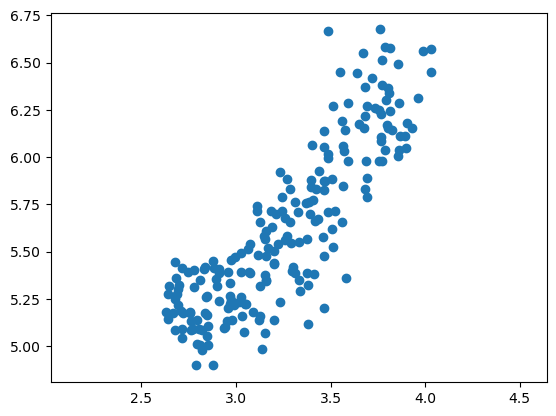

0.8604149377143469


In [15]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


#### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

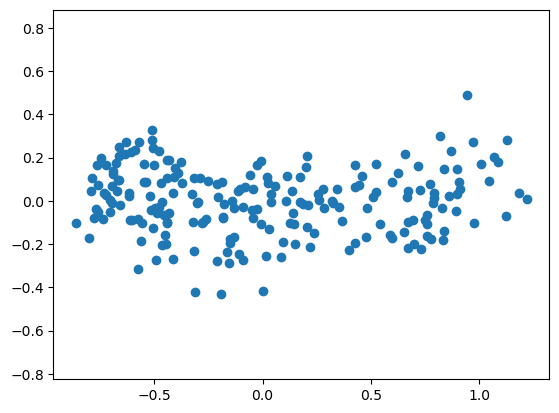

7.632783294297951e-17


In [16]:
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

The value 7.632783294297951e-17 is the result of the calculated Pearson correlation coefficient between the two principal components (xs and ys) in your PCA analysis. This value is extremely close to zero, which indicates a very weak or practically no linear correlation between the two principal components.

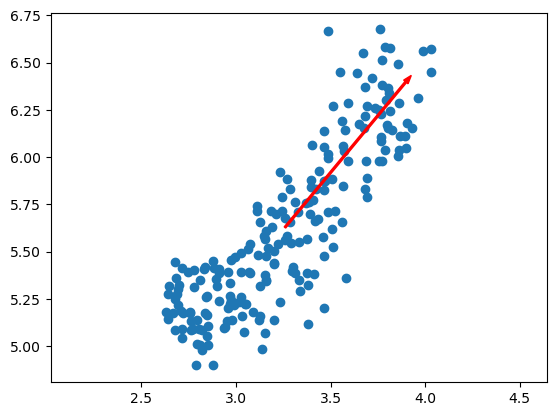

In [17]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [20]:
len(model.components_)

2

#### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

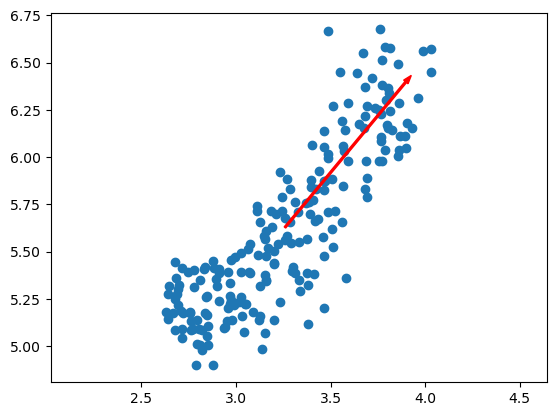

In [23]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

#### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its <b>intrinsic dimension?</b> Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [32]:
fish=pd.read_csv('G:\\datacamp\\22.  unsupervised\\Fish Measurements.csv',header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [37]:
samples=fish.iloc[:, 1:]
samples.shape

(85, 6)

In [40]:
samples

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2
81,1250.0,52.0,56.0,59.7,17.9,11.7
82,1600.0,56.0,60.0,64.0,15.0,9.6
83,1550.0,56.0,60.0,64.0,15.0,9.6


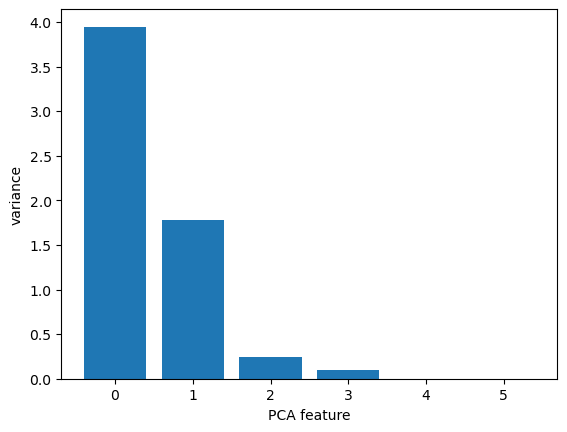

In [38]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [41]:
scaled_samples = pipeline.transform(samples)

#### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [42]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


#### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets

In [43]:
imagine_a_documents=['cats say meow', 'dogs say woof', 'dogs chase cats']

In [46]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(imagine_a_documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


#### Clustering Wikipedia

In [21]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('G:\\datacamp\\22.  unsupervised\\Wikipedia articles\\Wikipedia articles\\wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [22]:
print(titles)

['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymphoma', 'Chad 

In [48]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [47]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [49]:

pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    label                                        article
19      0  2007 United Nations Climate Change Conference
18      0  2010 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
14      0                                 Climate change
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
47      0                                          Fever
10      0                                 Global warming
46      1                                     Prednisone
45      1                                    Hepatitis C
44      1                                           Gout
43      1                                       Leukemia
42      1                                    Doxycycline
41      1                      

## 4/Discovering Interpretable Features
### 4.1//Non-negative matrix factorization (NMF) applied to articles

In [54]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model =NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

### NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component

In [55]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df_2 = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df_2.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df_2.loc['Denzel Washington'])


0    0.003815
1    0.000000
2    0.000000
3    0.571951
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419626
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


#### NMF learns topics of documents
In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [111]:
file_path = 'G:\\datacamp\\22.  unsupervised\\Wikipedia articles\\Wikipedia articles\\words.txt'

with open(file_path, 'r') as wfile:
    text_content = wfile.read()

words= text_content.split()
print(words[:5])

['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment']


In [112]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:] # this row 3 has highest significant between them

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.632010
award      0.254796
starred    0.246899
role       0.212843
actress    0.187624
Name: 3, dtype: float64


#### Which articles are similar to 'Cristiano Ronaldo'?
In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [113]:
from sklearn.preprocessing import normalize
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


#### Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [170]:
df_artist = pd.read_csv('G:\\datacamp\\22.  unsupervised\\Musical artists\\Musical artists\\artists.csv',header=None)
samples = pd.read_csv('G:\\datacamp\\22.  unsupervised\\Musical artists\\Musical artists\\sample.csv')


In [171]:
samples


,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159
...,...,...,...
2889,0,75,371
2890,0,26,58
2891,0,52,58
2892,0,54,53


In [172]:
artists1 = samples.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
print(artists1.head())

     user_offset  artist_offset  playcount
21             2              0        105
96            15              0        165
147           20              0         91
151           21              0         98
208           29              0        120


In [173]:
from scipy import sparse
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = sparse.coo_matrix((data1, (row_ind, col_ind)))
print(artists)
print(artists.shape)

  (0, 2)	105
  (0, 15)	165
  (0, 20)	91
  (0, 21)	98
  (0, 29)	120
  (0, 48)	236
  (0, 70)	67
  (0, 95)	77
  (0, 96)	93
  (0, 109)	98
  (0, 113)	63
  (0, 126)	63
  (0, 127)	429
  (0, 130)	151
  (0, 132)	103
  (0, 152)	83
  (0, 153)	65
  (0, 162)	54
  (0, 181)	456
  (0, 183)	592
  (0, 186)	111
  (0, 193)	158
  (0, 194)	53
  (0, 195)	216
  (0, 201)	89
  :	:
  (109, 444)	82
  (109, 450)	271
  (109, 467)	107
  (109, 472)	130
  (109, 478)	776
  (109, 483)	66
  (109, 498)	55
  (110, 56)	51
  (110, 60)	272
  (110, 119)	156
  (110, 149)	87
  (110, 165)	112
  (110, 291)	104
  (110, 325)	183
  (110, 345)	106
  (110, 358)	80
  (110, 360)	111
  (110, 361)	57
  (110, 414)	92
  (110, 429)	60
  (110, 433)	388
  (110, 460)	66
  (110, 463)	105
  (110, 465)	128
  (110, 468)	69
(111, 500)


In [174]:
artists

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

In [175]:

from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [176]:
norm_features.shape

(111, 20)

#### suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names

In [182]:
df_artist.head(), df_artist.shape

(                0
 0  Massive Attack
 1         Sublime
 2    Beastie Boys
 3      Neil Young
 4   Dead Kennedys,
 (111, 1))

In [185]:
artist_names1 = df_artist.values.tolist()
print(type(artist_names1))
print(len(artist_names1))
#print(artist_names1)

<class 'list'>
111


In [192]:
print(artist_names1[0:3])

[['Massive Attack'], ['Sublime'], ['Beastie Boys']]


In [186]:
flattened = []
for sublist in artist_names1:
    for val in sublist:
        flattened.append(val)
        
flattened  = [val for sublist in artist_names1 for val in sublist]
flattened 

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital',
 'Miles Davis',
 'Leonard Cohen',
 'Van Morrison',
 'NOFX',
 'Rancid',
 'Lamb',
 'Korn',
 'Dropkick Murphys',
 'Bob Dylan',
 'Eminem',
 'Nirvana',
 'Van Halen',
 'Damien Rice',
 'Elvis Costello',
 'Everclear',
 'Jimi Hendrix',
 'PJ Harvey',
 'Red Hot Chili Peppers',
 'Ryan Adams',
 'Soundgarden',
 'The White Stripes',
 'Madonna',
 'Eric Clapton',
 'Bob Marley',
 'Dr. Dre',
 'The Flaming Lips',
 'Tom Waits',
 'Moby',
 'Cypress Hill',
 'Garbage',
 'Fear Factory',
 '50 Cent',
 'Ani DiFranco',
 'Matchbox Twenty',
 'The Police',
 'Eagles',
 'Phish',
 'Stone Temple Pilots',
 'Black Sabbath',
 'Britney Spears',
 'Fatboy Slim',
 'System of a Down',
 'Simon & Garfunkel',
 'Snoop Dogg',
 'Aimee Mann',
 'Less Than Jake',
 'Rammstein',
 'Reel Big Fish',
 'The Prodigy',
 'Pantera',
 'Foo Fighters',
 'The Beatles',
 'Incubus',
 'Audioslave',
 'Bright Eyes',
 'Machine Head',
 'AC/DC',
 'Dire Straits',
 'Motör

In [190]:
df3 = pd.DataFrame(norm_features, index = flattened)

In [191]:

# Select row of 'Bruce Springsteen': artist
artist = df3.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df3.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bruce Springsteen    1.000000
Leonard Cohen        0.962840
Neil Young           0.951321
The Beach Boys       0.857608
Van Morrison         0.840967
dtype: float64
